# Reconocimiento de patrones: Clasificación
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clasificación%20II.ipynb)

## Técnicas de clasificación: El método Bayes ingenuo

El método Bayes ingenuo o *Naive Bayes* describe a una familia de clasificadores que utilizan el Teorema de Bayes para realizar la clasificación de nuevas observaciones de una manera ingenua: asumiendo que existe total independencia entre los diferentes atributos de un objeto. 

![ ](images/BayesSheldon.png)

Este es uno de los métodos de clasificación más populares, en parte debido a que funciona *sorprendentemente* bien en muchos problemas y en parte porque ofrece la <u>tranquilidad</u> de "estar basado" en una una rama de la matemática bien establecida y con una honorable y sólida reputación... cualquier cosa que esto último signifique :-|.

![ ](images/teacher.jpg)


### Teorema de Bayes

El teorema de Bayes describe la probabilidad de que ocurra un evento en base a las condiciones relacionadas al evento. Matemáticamente:

$$
P(A\ |\ B) = \frac{P(B\ |\ A)P(A)}{P(B)}
$$

Aquí 

* $A$ y $B$ son dos eventos cualesquiera; $P(A)$ es la probabilidad de que ocurra el evento $A$ y $P(B)$ la probabilidad de que ocurra $B$ sin importar su posible interrelación; asumimos que $P(B)\neq 0$.<br><br>

* $P(A\ |\ B)$ es la probabilidad (condicional) de que observemos el evento $A$ sabiendo (por evidencia, por suposición, por presunción o por afirmación) que ha ocurrido el evento $B$. <br><br>

* $P(B\ |\ A)$ es la probabilidad de $B$ dado $A$.


### Teorema de bayes y el problema de clasificación

El teorema de Bayes puede emplearse para determinar la clase a la que pertenece un elemento, bajo la siguiente re-escritura:

Supongamos que el elemento que queremos clasificar está representado por el vector de características $\mathbf{x} =(x_{1},\dots, x_{n})$ y el conjunto de posibles clases es $C = \{C_1\ldots, C_k\ldots, C_K\}$. Entonces, describimos la probabilidad de que $\mathbf{x}$ pertenezca a la clase $C_k$ como $p(C_{k}\ \mid\ x_{1},\dots, x_{n})$. De esta manera, debemos reescribir la ecuación del teorema de Bayes, para este caso como:<br><br>

\begin{eqnarray*}
P(C_{k} \mid\mathbf{x}) & = & \frac{P(\mathbf{x}\mid C_{k})P(C_{k})}{P(\mathbf{x})} \\
p(C_{k}\ \mid\ x_{1},\dots, x_{n}) & = & \frac{P(x_{1},\dots, x_{n}\mid C_{k})P(C_{k})}{P(x_{1},\dots, x_{n})}
\end{eqnarray*}<br><br>

Pero (la [distribución conjunta para variables condicionalmente dependientes](https://en.wikipedia.org/wiki/Joint_probability_distribution) establece)

$$
P(x_{1},\dots, x_{n}\mid C_{k})P(C_{k}) = P(C_{k},x_{1},\dots ,x_{n})
$$

Que puede reescribirse como:<br><br>

\begin{eqnarray*}
P(C_{k}, x_{1},\dots, x_{n}) & = & P(x_{1},\dots, x_{n}, C_{k})\\
& = & P(x_{1}\mid x_{2},\dots, x_{n}, C_{k})P(x_{2},\dots, x_{n},C_{k})\\
& = & P(x_{1}\mid x_{2},\dots, x_{n}, C_{k})P(x_{2} \mid x_{3},\dots, x_{n}, C_{k}) P(x_{3},\dots, x_{n}, C_{k}) \\
& = & \dots \\
& = & P(x_{1}\mid x_{2},\dots, x_{n}, C_{k}) P(x_{2}\mid x_{3},\dots, x_{n}, C_{k})\dots P(x_{n-1}\mid x_{n}, C_{k}) P(x_{n}\mid C_{k}) P(C_{k})
\end{eqnarray*}<br><br>

Ahora bien, si asumimos (**ingenuamente**) que las características $x_i$ y $x_j$ son condicionalmente independientes, para toda $i\neq j$, es decir, que la ocurrencia de una característica no está influenciada por la ocurrencia de otra de las características, entonces

$$P(x_{i}\mid x_{i+1},\dots, x_{n}, C_{k}) = P(x_{i}\mid C_{k})$$

Y podemos reescribir

$$P(C_{k}, x_{1},\dots, x_{n}) = P(x_{1}\mid C_{k}) P(x_{2}\mid C_{k})\dots  P(x_{n}\mid C_{k}) P(C_{k})$$

... y por lo tanto

$$P(C_{k} \mid x_1, \dots, x_n) = \frac{P(C_{k}) \prod_{i=1}^{n} P(x_i \mid C_{k})} {P(x_1, \dots, x_n)}$$

Por otra parte, $P(x_1, \dots, x_n)$ es es la misma para todas las $C_k$, entonces podemos ignorar este término y reescribir la ecuación anterior como:

$$P(C_{k} \mid x_1, \dots, x_n) \propto P(C_{k}) \prod_{i=1}^{n} P(x_i \mid C_{k})$$

La ecuación anterior nos proporciona la *distribución de probabilidades* de que el vector $\mathbf{x}$ pertenezca a cada una de las clases $C_1\ldots, C_K$, esto es, el modelo ingenuo de probabilidades de Bayes. Es decir, tenemos un conjunto de $K$ valores que representan cada uno la probabilidad de que el vector pertenezc a una de las clases. Ahora debemos utilizar este modelo para escoger una de las clases. Una opción común es seleccionar aquella clase que es más probable de ajustarse a $\mathbf{x}$. Esta decisión es lo que se conoce como estimación máxima a posteriori (**MAP**). 

Es decir, el clasificador de Bayes asigna al vector $\mathbf{x}$ la etiqueta de clase $\hat{c}=C_k$ para aquella $k$ que maximiza el valor de $P(C_{k} \mid x_1, \dots, x_n)$:

$$
\hat {c} = \underset{k\in \{1,\dots, K\}}{\operatorname{argmax}} \ P(C_{k}) \prod _{i=1}^{n} P(x_{i}\mid C_{k})
$$

$P(C_{k})$ es simplemente la frecuencia relativa de $C_{k}$ en el conjunto de entrenamiento. El valor de $P(x_{i}\mid C_{k})$, por otra parte, depende de la distribución de probabilidad que se asuma. La elección de la distribución de probabilidad determina el tipo de clasificador Bayes ingenuo.

Las principales opciones son:

* Distribución Gaussiana $\longrightarrow$ clasificador **bayessiano ingenuo con modelo gaussiano** (*Gaussian Naive Bayes*): Esta es la opción más común cuando se asume que los atributos tienen una distribución continua.<br><br>
![ ](images/Normal_Distribution.png)<br>
En este caso la probabilidad del atributo $x_i$ dada la clase $C_k$ está dado por:<br><br>
$$
P(x_i \mid C_k) = \frac{1}{\sqrt{2\pi\sigma^2_{C_k}}}\exp\left( -\frac{(x_i - \mu_{C_k})^2}{2\sigma^2_{C_k}} \right)
$$<br><br>
Analizando los datos del *Pima Indian Diabetes Data Set*, mediante la biblioteca *sklearn.naive_bayes.GaussianNB*, obtenemos:

In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import cluster # Auxiliar
import os
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

os.chdir('Data sets')
df = pd.read_csv("Pima Indian Data Set/pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

df.loc[df['pad'] == 0,'pad'] = np.nan
df.loc[df['ept'] == 0,'ept'] = np.nan
df.loc[df['is2h'] == 0,'is2h'] = np.nan
df.loc[df['imc'] == 0,'imc'] = np.nan
df = df.dropna()

df_pure = df[list(['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad'])]
df_class = df[list(['class'])]

In [2]:
cut = df.shape[0] // 3 * 2

complete_set = df_pure.values
complete_targets = df_class.values.ravel()
train_set = df_pure.head(cut).values
train_targets = df_class.head(cut).values.ravel()
test_set = df_pure.tail(df.shape[0]-cut).values
test_targets = df_class.tail(df.shape[0]-cut).values.ravel()

clf = GaussianNB()
clf.fit(complete_set, complete_targets)
class_complete = clf.predict(complete_set)
fails_complete = np.sum(complete_targets  != class_complete)
print("Puntos mal clasificados en el conjunto completo: {} de {} ({}%)\n"
      .format(fails_complete, len(complete_set), 100*fails_complete/len(complete_set)))

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto completo: 87 de 393 (22.137404580152673%)

Puntos mal clasificados en el conjunto de entrenamiento: 67 de 262 (25.572519083969464%)

Puntos mal clasificados en el conjunto de prueba: 26 de 131 (19.84732824427481%)



* Distribución multinomial $\longrightarrow$ clasificador **bayessiano ingenuo multinomial**: Una distribución multinomial es una distribución de probabilidades discreta en la que se tienen $n$ eventos independientes, cada una de ellas con una probabilidad $p_i$ de ocurrencia. Un vector de características $\mathbf{x} = (x_{1},\dots, x_{n})$, en este caso, es un histograma en el que $x_{i}$ es el número de veces que el evento $i$ fue observado en una instancia específica. 
![ ](images/multinomialDistribution.png)<br>
Esta  opción es una de las más utilizadas para clasificación de textos. En este caso, el vector de características  típicamente contabiliza la ocurrencia de palabras en un documento.
![ ](images/bag-of-words.png)
La distribución de probabilidades es descrita mediante los vectores $\theta_c = (\theta_{c_1},\ldots,\theta_{c_n})$ para cada clase $c \in \{C_1\ldots, C_k\ldots, C_K\}$. Aquí $\theta_{c_i} = P(x_i \mid c)$ es la probabilidad de que la característica $i$ se presente en una muestra perteneciente a la clase $c$. Una forma típica de estimar $\theta_{c_i}$ es a través de una forma [suavizada](https://en.wikipedia.org/wiki/Additive_smoothing) de la frecuencia: <br><br>
$$
\hat{\theta}_{c_i} = \frac{ N_{c_i} + \alpha}{N_c + \alpha n}
$$<br>
En esta ecuación, $N_{c_i} = \sum_{x \in T} x_i$, es el número total de veces que aparece el atributo $i$ en las muestras de la clase $c$ del conjunto de entrenamiento $T$, $N_{y} = \sum_{i=1}^{|T|} N_{c_i}$ y $\alpha \ge 0$ es el parámetro de suavizado. El parámetro $\alpha$ se utiliza para prevenir la no ocurrencia de algún atributo en las muestras de aprendizaje.<br><br>
Un ejemplo simple con datos sintéticos, utilizando la biblioteca *sklearn.naive_bayes.MultinomialNB*:

Primeros 5 vectores:
 [[ 9  5  0 11 11 14  2  4 11  1 14 14 10  8  0  1  3  5  6  5]
 [ 5 14  8  2 13 12  3  5 10  1  6  3 14  0 10  7  4  0 11 14]
 [ 8  0  5  1  8 14  2 10 14 10 11  3 10 10  1  3  9  9 10  4]
 [ 9 11 10  7  1 13  4  9 10 12 13  5  1  1  9  6  2  3 13  1]
 [ 8 13 14 10  1 11  8  4 12  7  3  6  3  0 12  1  2 14  7  4]]


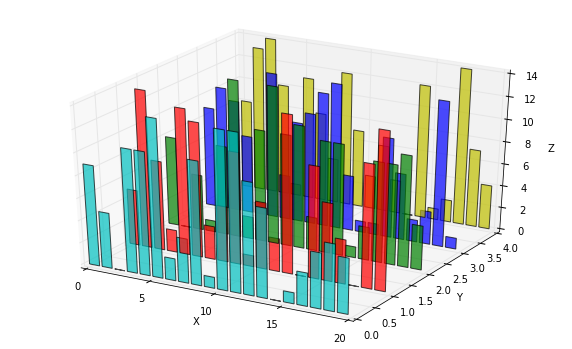

Resultados del entrenamiento (muestras por clase)
[ 20.  24.  14.  24.  18.]

Vectores de prueba
[[ 9  2 11  0 14  3  5  5  8 13  3 12 10  7  3  4  6  2 12  0]
 [10  5  4  1 13  5 10  4  4 13 13 10  6  6  4  4  1 10  6  2]
 [ 3  5  0 13  2  6 13  6  1  6 13  1  9  2 13 11  7  0 11  4]
 [ 6 13 11 12  4  1 13  9 14 13 13  3 14 12  4  0 10 12  1  0]
 [13 13  5  5  3  6 11  4 13 13  7  3 11  5  4  2  1  8  3  0]]

Clase por vector de prueba
[3 1 0 1 1]

Tabla de probabilidades
[[ 0.    0.    0.    1.    0.  ]
 [ 0.    0.74  0.    0.26  0.  ]
 [ 1.    0.    0.    0.    0.  ]
 [ 0.    0.93  0.01  0.05  0.01]
 [ 0.18  0.41  0.    0.4   0.02]]

Clasificación esperada de los 5 primeros datos de etrenamiento
[1 0 1 0 0]

Tabla de probabilidades para datos de entrenamiento
[[ 0.    1.    0.    0.    0.  ]
 [ 0.98  0.    0.    0.    0.02]
 [ 0.12  0.88  0.    0.    0.  ]
 [ 0.99  0.01  0.    0.    0.  ]
 [ 0.87  0.    0.    0.    0.13]]


In [3]:
num_features = 20
num_vectors = 100
num_clases = 5
data_array = np.random.randint(15, size=(num_vectors, num_features))
print("Primeros 5 vectores:\n", data_array[:5])

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
colors = ['c', 'r', 'g', 'b', 'y']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(4, -1, -1): 
    cs = colors[i % len(colors)] * num_features
    ax.bar(x_data[i], data_array[i], zs=y_data[i], zdir='y', color=cs, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#
k_means = cluster.KMeans(n_clusters=num_clases, init='random')
k_means.fit(data_array) 
y = k_means.fit_predict(data_array)
#

clfM = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
clfM.fit(data_array, y)
print("Resultados del entrenamiento (muestras por clase)\n{}\n".format(clfM.class_count_))

test_data_array = np.random.randint(15, size=(5, num_features))
print("Vectores de prueba\n{}\n\nClase por vector de prueba\n{}\n"
      .format(test_data_array, clfM.predict(test_data_array)))
print("Tabla de probabilidades\n{}\n".format(clfM.predict_proba(test_data_array)))

print("Clasificación esperada de los 5 primeros datos de etrenamiento\n{}\n"
      .format(y[0:5]))
print("Tabla de probabilidades para datos de entrenamiento\n{}"
      .format(clfM.predict_proba(data_array[0:5])))


* Distribución Bernoulli $\longrightarrow$ clasificador **Bayes ingenuo Bernoulli** (*Bernoulli Naive Bayes*): Una distribución de Bernoulli es una distribución de probabilidades discreta de una variable aleatoria que sólo toma dos valores: el valor 1 con una probabilidad (de *éxito*) $p$ y el valor 0 con una probabilidad (de *fracaso*) $q=p-1$. 
![ ](images/bernoulli.png)
Lo cual se expresa mediante la función de densidad:<br><br>
$$ P(n)=
\begin{cases} 
1-p, & \mbox{para } n = 0 \\ 
p, & \mbox{para } n = 1
\end{cases}
$$<br>
lo cual puede reescribirse como:
$$P(n)=p^n(1-p)^{1-n}$$<br> 
Un modelo multivariado de Bernoulli asume que las observaciones de un evento pueden describirse mediante un vector de atributos independientes booleanos $\mathbf{x} = (x_{1},\dots, x_{n})$, donde $x_{i}$ expresa la ocurrencia o ausencia del atributo $i$ en lugar de reflejar la frecuencia relativa. Entonces, la probabilidad de una observación $\mathbf{x}$ dada la clase $C_{k}$ está dada por
$$P(\mathbf{x} \vert C_k)=\prod_{i=1}^n p_{k_i}^{x_i} (1-p_{k_i})^{(1-x_{i})}$$
donde $p_{k_i} = P (x_i\mid C_k)$.<br><br>
Un ejemplo simple con datos sintéticos, utilizando la biblioteca *sklearn.naive_bayes.BernoulliNB*: 

Primeros 5 vectores:
 [[0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0]
 [0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0]
 [0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1]
 [0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0]
 [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1]]


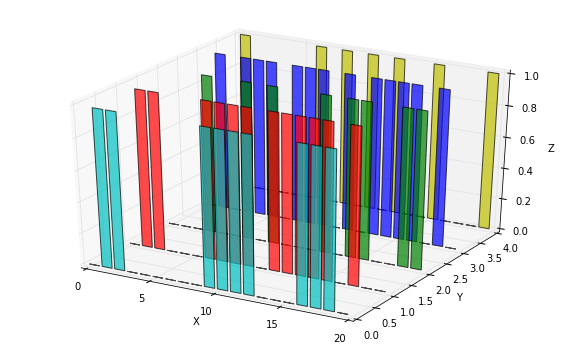

Resultados del entrenamiento (muestras por clase)
[ 20.  25.  23.  16.  16.]

Vectores de prueba
[[0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0]
 [1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0]
 [1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1]]

Clase por vector de prueba
[2 1 1]

Tabla de probabilidades
[[ 0.22  0.08  0.53  0.12  0.05]
 [ 0.11  0.73  0.08  0.05  0.03]
 [ 0.    0.99  0.01  0.    0.  ]]

Clasificación esperada de los 5 primeros datos de etrenamiento
[4 3 0 4 0]

Tabla de probabilidades para datos de entrenamiento
[[ 0.06  0.    0.01  0.    0.92]
 [ 0.    0.    0.03  0.96  0.01]
 [ 0.81  0.    0.08  0.1   0.  ]
 [ 0.    0.18  0.03  0.05  0.75]
 [ 0.98  0.    0.02  0.    0.  ]]


In [4]:
num_features = 20
num_vectors = 100
num_clases = 5
data_array = np.random.randint(2, size=(num_vectors, num_features))
print("Primeros 5 vectores:\n", data_array[:5])

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
colors = ['c', 'r', 'g', 'b', 'y']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(4, -1, -1): 
    cs = colors[i % len(colors)] * num_features
    ax.bar(x_data[i], data_array[i], zs=y_data[i], zdir='y', color=cs, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#
k_means = cluster.KMeans(n_clusters=num_clases, init='random')
k_means.fit(data_array) 
y = k_means.fit_predict(data_array)
#

clfB = BernoulliNB(alpha=1.0, class_prior=None, fit_prior=False)
clfB.fit(data_array, y)
print("Resultados del entrenamiento (muestras por clase)\n{}\n".format(clfB.class_count_))

test_data_array = np.random.randint(2, size=(3, num_features))
print("Vectores de prueba\n{}\n\nClase por vector de prueba\n{}\n"
      .format(test_data_array, clfB.predict(test_data_array)))
print("Tabla de probabilidades\n{}\n".format(clfB.predict_proba(test_data_array)))

print("Clasificación esperada de los 5 primeros datos de etrenamiento\n{}\n"
      .format(y[0:5]))
print("Tabla de probabilidades para datos de entrenamiento\n{}"
      .format(clfB.predict_proba(data_array[0:5])))


### Observaciones

* El método ingenuo de Bayes suele ser visto como un método más "*formal*" que los métodos basados en ejemplos, dado que se basa en un modelo formal, aunque muy limitado.

* Las diferentes variantes del clasificador bayesiano ingenuo se diferencian por las suposiciones acerca de la distribución de las probabilidades $P(x_i \mid y)$.

* A pesar de las suposiciones sobre simplificadoras, los clasificadores bayesianos ingenuos dan buenos resultados en problemas reales, particularmente en el área de clasificación de textos.

* Los clasificadores bayesianos ingenuos son considerablemente más rápidos que métodos más sofisticados, particularmente cuando crece el número de atributos.

* Los métodos bayesianos ingenuos son buenos clasificadores, pero malos estimadores.


<hr style="border-width: 3px;">

### Tarea 9

* Realice pruebas de los clasificadores bayesianos ingenuos sobre sus datos.

**Fecha de entrega**: Martes 21 de marzo.